In [ ]:
import os, sys, glob, json, scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
os.chdir("../")
path = os.getcwd()
sys.path.insert(0, path)
import GWGen
from GWGen.WFGenerator import *

In [53]:
gwdir =  "/home/shaunf/Documents/Computer/Code/projects/Massive_Vector_Field_Dynamical_Friction/ProcaAroundKerr/GWGenerator"
foldpath = gwdir+"/Data/Output/"
filenames = glob.glob(foldpath+"*.json")
data = []
for file in filenames:
    with open(file, "r") as f:
        data.append(json.load(f))
data[-1]
datframe = pd.DataFrame(data)

In [ ]:
xdat = datframe["SMBHMASS"]
ydat = datframe["PROCAMASS"]
zdat = datframe["faithfulness"]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,45)

In [ ]:
tmpdat = datframe[(datframe["e0"]==0.1)&(datframe["BHSpin"]==0.8)]
xdat = tmpdat["SMBHMASS"]
ydat = tmpdat["PROCAMASS"]
zdat = tmpdat["faithfulness"]
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(np.log10(xdat), np.log10(ydat), zdat,s=3)
ax.set_ylabel("Proca Masses (Log10(eV))")
ax.set_xlabel("SMBH Masses (Log10(Msun))")
ax.view_init(15,60)

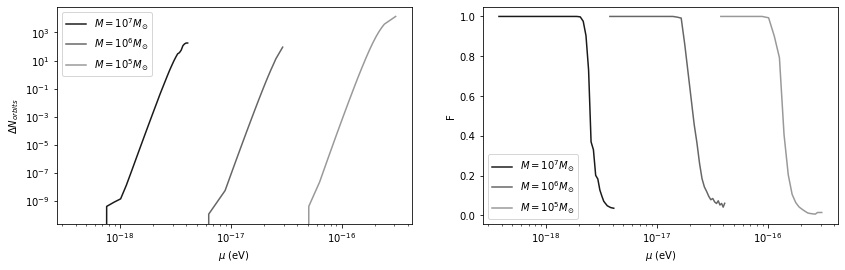

In [57]:
bhmass1 = 1e7
bhmass2 = 1e6
bhmass3 = 1e5
e0 = 0.2
bhspin = 0.9
newdat1 = datframe[(datframe["SMBHMASS"]==bhmass1)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)].sort_values("PROCAMASS")
newdat2 = datframe[(datframe["SMBHMASS"]==bhmass2)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)].sort_values("PROCAMASS")
newdat3 = datframe[(datframe["SMBHMASS"]==bhmass3)&(datframe["e0"]==e0)&(datframe["BHSpin"]==bhspin)].sort_values("PROCAMASS")
newdat1 = newdat1.sort_values("PROCAMASS")
newdat2 = newdat2.sort_values("PROCAMASS")
newdat3 = newdat3.sort_values("PROCAMASS")

xdat1 = newdat1["PROCAMASS"].values
wdat1 = np.abs(newdat1["DeltaNOrbits"]).values
zdat1 = newdat1["faithfulness"].values
xdat2 = newdat2["PROCAMASS"].values
wdat2 = np.abs(newdat2["DeltaNOrbits"]).values
zdat2 = newdat2["faithfulness"].values
xdat3 = newdat3["PROCAMASS"].values
wdat3 = np.abs(newdat3["DeltaNOrbits"]).values
zdat3 = newdat3["faithfulness"].values


fig,ax = plt.subplots(1,2,figsize=(14,4))
#plt.subplots_adjust(hspace=0.5)
ax[0].plot(xdat1,wdat1,label="$M=10^7 M_{\odot}$",color='0.1');
inx =3
xarr = np.delete(np.append(xdat2[:18],xdat2[20]),inx)
yarr = np.delete(np.append(wdat2[:18],wdat2[20]),inx)
ax[0].plot(xarr, yarr,label="$M=10^6 M_{\odot}$",color='0.4')
#ax[0].plot(np.append(xdat2[:18],xdat2[20]), np.append(wdat2[:18],wdat2[20]),label="$M=10^6 M_{\odot}$",color='0.4')
inx1=17
inx2=inx1+3
ax[0].plot(np.append(xdat3[:inx1], xdat3[inx2:]), np.append(wdat3[:inx1], wdat3[inx2:]),label="$M=10^5 M_{\odot}$",color='0.6')

ax[0].legend()
ax[0].set_yscale("log");
ax[0].set_xscale("log")
ax[0].set_ylabel("$\Delta N_{orbits}$")
ax[0].set_xlabel("$\mu$ (eV)")


ax[1].plot(xdat1,zdat1,label="$M=10^7 M_{\odot}$",color='0.1');
inx1=12
inx2=inx1+2
ax[1].plot(np.append(xdat2[:inx1], xdat2[inx2:]), np.append(zdat2[:inx1], zdat2[inx2:]),label="$M=10^6 M_{\odot}$",color='0.4')
ax[1].plot(xdat3, zdat3, label="$M=10^5 M_{\odot}$",color="0.6")
ax[1].legend()
ax[1].set_xscale("log")
ax[1].set_ylabel("F")
ax[1].set_xlabel("$\mu$ (eV)")
ax[1].set_ylabel;


plt.savefig(gwdir+"/Data/AnalysisPlots/faith_Norbits_masses.png", dpi=1000, format="png",bbox_inches="tight")

In [ ]:
alpha1 = [alphavalue(bhmass1, i).value for i in xdat1]
alpha2 = [alphavalue(bhmass2, i).value for i in xdat2]
alpha3 = [alphavalue(bhmass3, i).value for i in xdat3]
plt.plot(alpha1, zdat1,label="M="+str(bhmass1)+"$M_{\odot}$")
plt.plot(alpha2, zdat2,label="M="+str(bhmass2)+"$M_{\odot}$")
plt.plot(alpha3, zdat3,label="M="+str(bhmass3)+"$M_{\odot}$")
plt.legend()